In [1]:
# Import the required toolkit

# Navigate to the project script directory
import os
os.chdir('/g/data/jk72/ck4840/projects/um_emc2/scripts')
# Check current project directory
print("Project directory:", os.getcwd())
# Import toolkit in project directory
import um_emc2_toolkit
print('Successfully imported all required packages')

Project directory: /g/data/jk72/ck4840/projects/um_emc2/scripts
Successfully imported all required packages


# Instrument & model class setup

Create the MPL instrument class instance

In [2]:
MPL = um_emc2_toolkit.HSRL()

Create the MWACR instrument class instance

In [5]:
MWACR = um_emc2_toolkit.WACR(site = 'micre')

Load the model data and create the UM model class instance

In [3]:
# Set the path to the model data
file_path = '/g/data/jk72/ck4840/projects/emc2/data/um_reg/um_reg_output/um_reg_marcus_20180204.nc'

# Create instances of the UM model class
UM_reg_instance_lidar_radiation = um_emc2_toolkit.UM(file_path)
UM_reg_instance_radar_radiation = um_emc2_toolkit.UM(file_path)

# Create simulated data

In [6]:
# Create simulated lidar data using radiation logic
UM_reg_emc2_marcus_MPL_radiation_model = um_emc2_toolkit.emc2.simulator.main.make_simulated_data(UM_reg_instance_lidar_radiation, MPL, N_columns = 1, do_classify = True, convert_zeros_to_nan = True, use_rad_logic = True, parallel = False, calc_re = True)
print('Successfully completed lidar instrument simulation using radiation logic')
print('\n')

# Create simulated radar data using radiation logic
UM_reg_emc2_marcus_MWACR_radiation_model = um_emc2_toolkit.emc2.simulator.main.make_simulated_data(UM_reg_instance_radar_radiation, MWACR, N_columns = 1, do_classify = True, convert_zeros_to_nan = True, use_rad_logic = True, parallel = False, calc_re = True)
print('Successfully completed radar instrument simulation using radiation logic')

## Creating subcolumns...
No convective processing for UM_reg
num_subcolumns == 1 (subcolumn generator turned off); setting subcolumns frac fields to 1 for startiform cl and ci based on q > 0. kg/kg
Done! total processing time = 0.01s
num_subcolumns == 1 (subcolumn generator turned off); setting subcolumns frac fields to 1 for strat precip based on q > 0. kg/kg
Done! total processing time = 0.02s
num_subcolumns == 1 (subcolumn generator turned off); setting subcolumns q (and N micro logic) fields for cl equal to grid-cell mean
num_subcolumns == 1 (subcolumn generator turned off); setting subcolumns q (and N micro logic) fields for ci equal to grid-cell mean
num_subcolumns == 1 (subcolumn generator turned off); setting subcolumns q (and N micro logic) fields for pl equal to grid-cell mean
num_subcolumns == 1 (subcolumn generator turned off); setting subcolumns q (and N micro logic) fields for pi equal to grid-cell mean
num_subcolumns == 1 (subcolumn generator turned off); setting subcol

# Plot simulated data

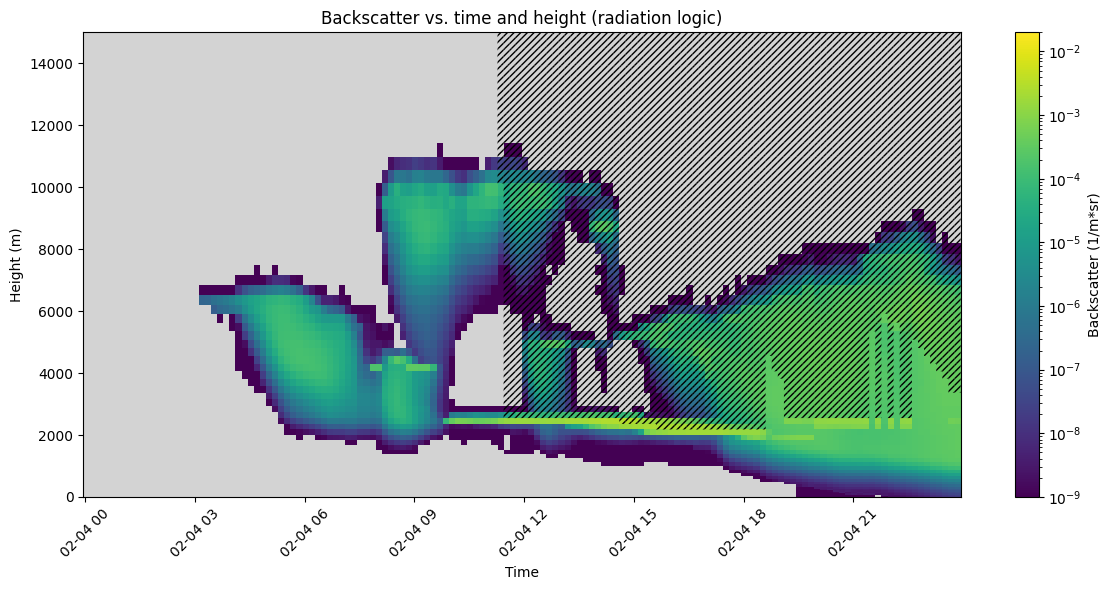

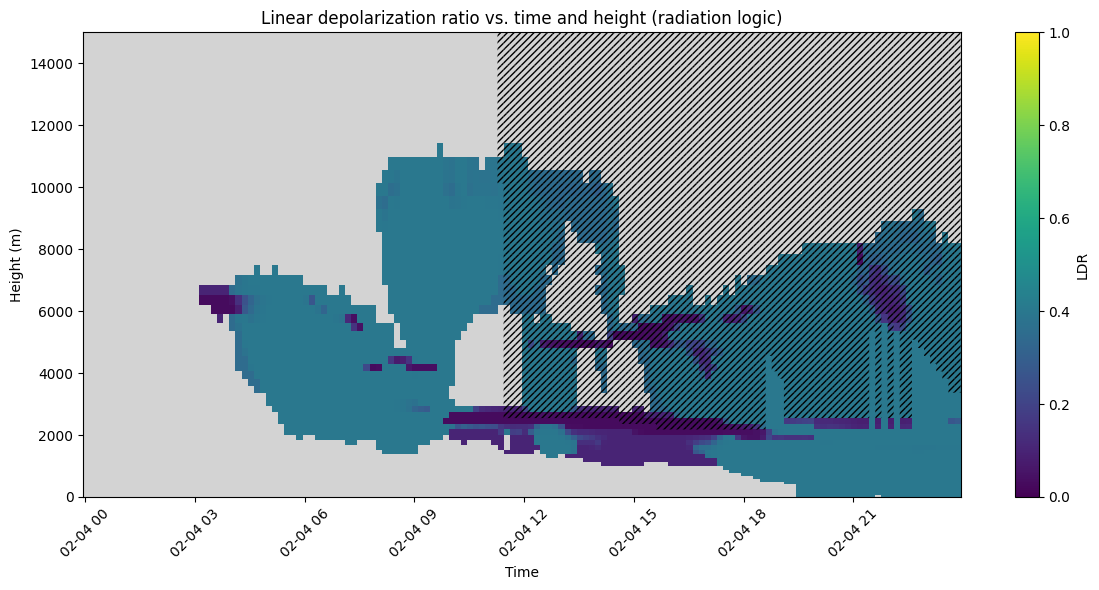

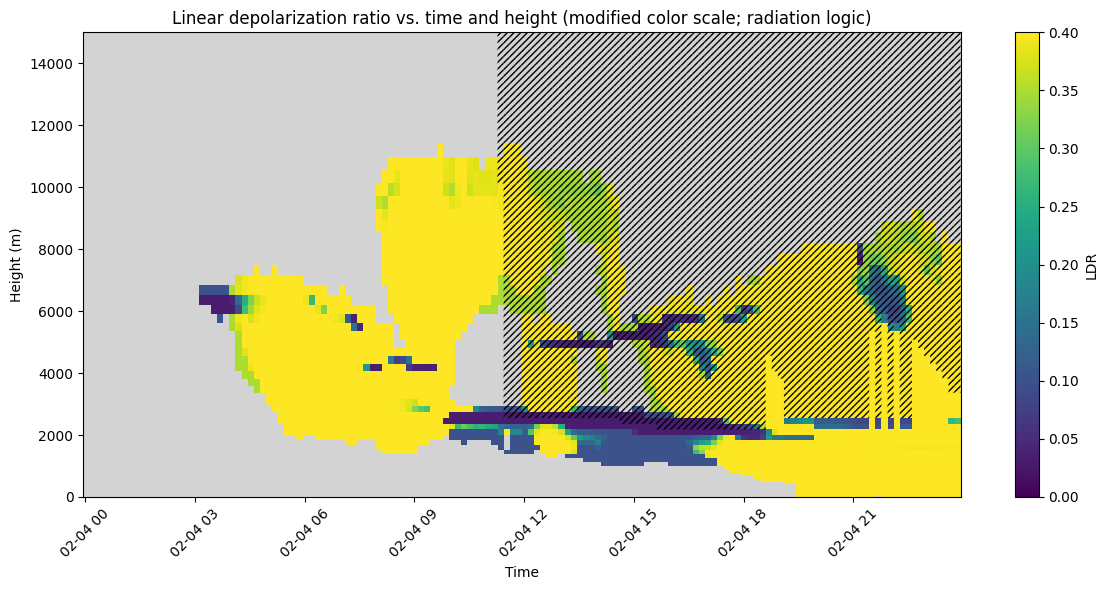

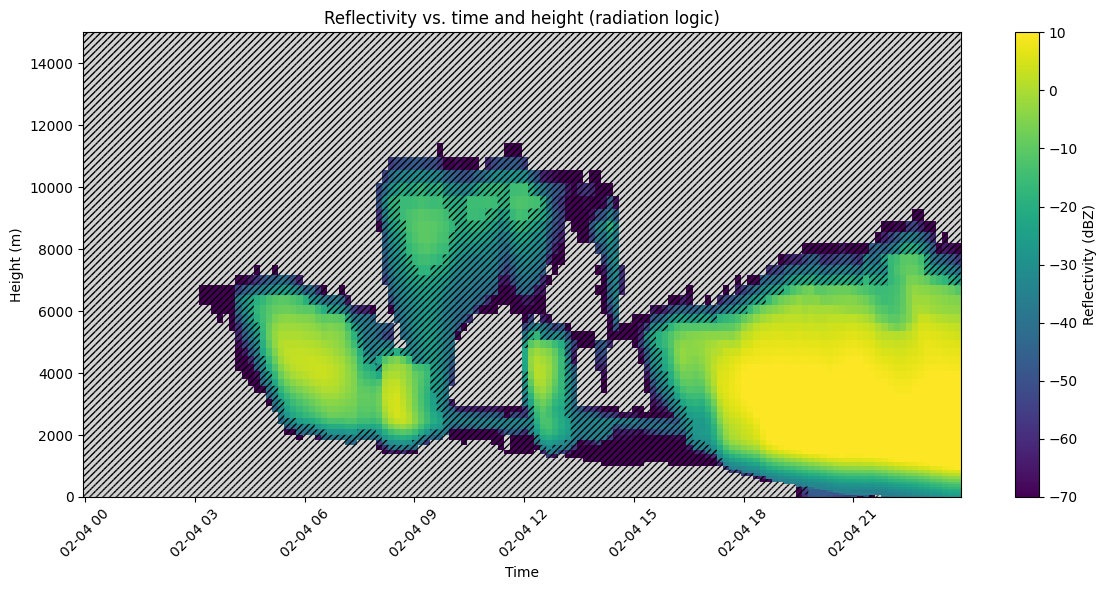

In [16]:
from um_emc2_toolkit import np, plt, LogNorm, mpl

# Set the height limit for the plots
ylim_max = 15000

# Lidar backscatter
# Create a meshgrid for time and height to be used for all lidar plots produced from the current file
time_mesh, height_mesh = np.meshgrid(UM_reg_emc2_marcus_MPL_radiation_model.ds['time'], UM_reg_emc2_marcus_MPL_radiation_model.ds['level_height'])
# Extract the desired variable
backscatter = UM_reg_emc2_marcus_MPL_radiation_model.ds['sub_col_beta_p_tot_strat'].isel(subcolumn=0).drop('subcolumn')
# Create the plot with a grey background
plt.figure(figsize = (12, 6))
plt.gca().set_facecolor('lightgrey')
# Create and organise a pcolormesh plot
pcm = plt.pcolormesh(time_mesh, height_mesh, backscatter.T, cmap = 'viridis', shading = 'auto', norm=LogNorm(vmin=1e-9, vmax=2e-2))
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.colorbar(pcm, label = 'Backscatter (1/m*sr)')
plt.title('Backscatter vs. time and height (radiation logic)')
plt.ylim(0, ylim_max)
plt.xticks(rotation = 45)
plt.tight_layout()
# Mask areas where ext_mask != 2
ext_mask = UM_reg_emc2_marcus_MPL_radiation_model.ds['ext_mask'].isel(subcolumn=0).drop('subcolumn')
masked_ext_mask = np.where(ext_mask == 2, ext_mask, np.nan)
# Overplot areas where ext_mask == 2 with black hatching
plt.pcolor(time_mesh, height_mesh, masked_ext_mask.T, hatch='/////', alpha=0.)
UM_reg_emc2_output_backscatter = plt.gcf()

# Lidar linear depolarization ratio
# Extract the desired variable
depol = UM_reg_emc2_marcus_MPL_radiation_model.ds['sub_col_LDR_strat'].isel(subcolumn=0).drop('subcolumn')
# Create the plot with a grey background
plt.figure(figsize = (12, 6))
plt.gca().set_facecolor('lightgrey')
# Create and organise a pcolormesh plot
pcm = plt.pcolormesh(time_mesh, height_mesh, depol.T, cmap = 'viridis', shading = 'auto', vmin=0, vmax=1)
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.colorbar(pcm, label = 'LDR')
plt.title('Linear depolarization ratio vs. time and height (radiation logic)')
plt.ylim(0, ylim_max)
plt.xticks(rotation = 45)
plt.tight_layout()
# Overplot areas where ext_mask == 2 with black hatching
plt.pcolor(time_mesh, height_mesh, masked_ext_mask.T, hatch='/////', alpha=0.)
UM_reg_emc2_output_depol = plt.gcf()

# Lidar linear depolarization ratio - modified color scale
# Create the plot with a grey background
plt.figure(figsize = (12, 6))
plt.gca().set_facecolor('lightgrey')
# Create and organise a pcolormesh plot
pcm = plt.pcolormesh(time_mesh, height_mesh, depol.T, cmap = 'viridis', shading = 'auto', vmin=0, vmax=0.4)
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.colorbar(pcm, label = 'LDR')
plt.title('Linear depolarization ratio vs. time and height (modified color scale; radiation logic)')
plt.ylim(0, ylim_max)
plt.xticks(rotation = 45)
plt.tight_layout()
# Mask areas where ext_mask != 2
ext_mask = UM_reg_emc2_marcus_MPL_radiation_model.ds['ext_mask'].isel(subcolumn=0).drop('subcolumn')
masked_ext_mask = np.where(ext_mask == 2, ext_mask, np.nan)
# Overplot areas where ext_mask == 2 with black hatching
plt.pcolor(time_mesh, height_mesh, masked_ext_mask.T, hatch='/////', alpha=0.)
UM_reg_emc2_output_depol_mod = plt.gcf()

# Radar reflectivity
# Create a meshgrid for time and height to be used for all radar plots produced from the current file
time_mesh, height_mesh = np.meshgrid(UM_reg_emc2_marcus_MWACR_radiation_model.ds['time'], UM_reg_emc2_marcus_MWACR_radiation_model.ds['level_height'])
# Extract the desired variable
reflectivity = UM_reg_emc2_marcus_MWACR_radiation_model.ds['sub_col_Ze_tot_strat'].isel(subcolumn=0).drop('subcolumn')
# Create the plot with a grey background
plt.figure(figsize = (12, 6))
plt.gca().set_facecolor('lightgrey')
# Create and organise a pcolormesh plot
pcm = plt.pcolormesh(time_mesh, height_mesh, reflectivity.T, cmap = 'viridis', shading = 'auto', vmin = -70, vmax = 10)
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.colorbar(pcm, label = 'Reflectivity (dBZ)')
plt.title('Reflectivity vs. time and height (radiation logic)')
plt.ylim(0, ylim_max)
plt.xticks(rotation = 45)
plt.tight_layout()
# Mask areas where ext_mask != 1
detect_mask = UM_reg_emc2_marcus_MWACR_radiation_model.ds['detect_mask'].isel(subcolumn=0).drop('subcolumn')
masked_detect_mask = np.where(detect_mask == 1, detect_mask, np.nan)
masked_detect_mask = np.where(np.isnan(reflectivity), 1, masked_detect_mask)
# Overplot areas where ext_mask == 1 with black hatching
plt.pcolor(time_mesh, height_mesh, masked_detect_mask.T, hatch='/////', alpha=0.)
UM_reg_emc2_output_reflectivity = plt.gcf()